image:  (640, 640)
nump_pc:  256
Z (640, 256)
redu 60.0


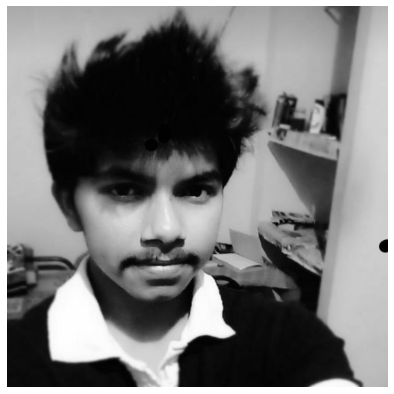

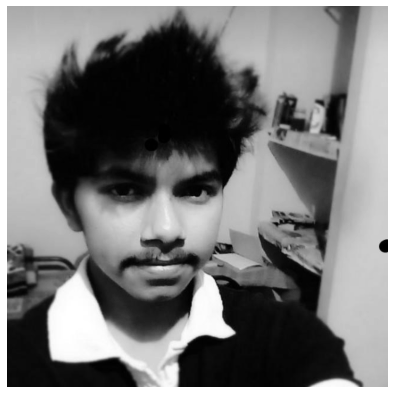

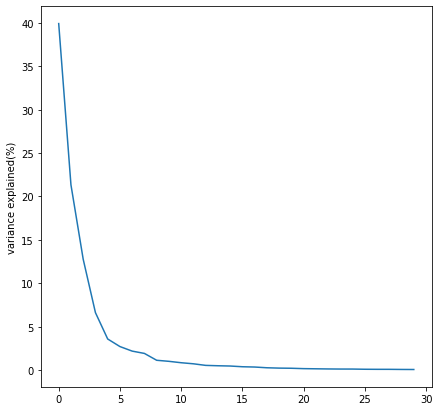

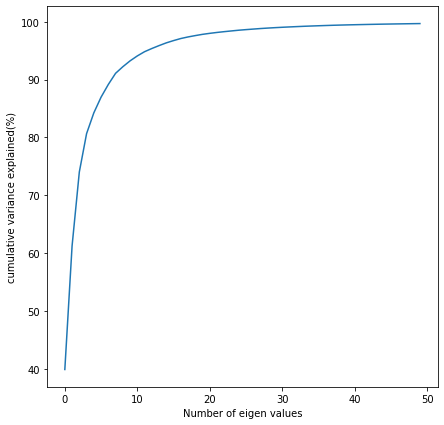

In [57]:
from matplotlib.image import imread
from PIL import Image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def read_image2(img):
    img = imread(img)
    R, G, B = img[:, :, 0], img[:, : , 1], img[:, :, 2]
    return 0.2989 * R + 0.5870 * G + 0.1140 * B

def print_image_from_array(X):
    img = plt.imshow(X)
    img.set_cmap('gray')
#     plt.rcParams['figure.figsize'] = [4.5, 4.5]
    plt.rcParams['figure.figsize'] = [7, 7]
    plt.axis('off')
    plt.show()

def read_image(file_name):
    return io.imread(file_name, as_gray=True)

# def print_image_from_array(img):
#     return Image.fromarray(np.uint8(cm.gist_earth(img)*255))
    
class PCA:
    def __init__(self, img):
        self.X = img.copy()
        print('image: ', self.X.shape)
        self.u_X = np.mean(self.X, axis = 0)
        self.X_centred = self.X - self.u_X
        self.X_cov = np.cov(self.X, rowvar = False)
        self.eigen_vals, self.eigen_vecs = np.linalg.eigh(self.X_cov)
        
        idx = np.argsort(self.eigen_vals)[::-1]
        self.eigen_vals = self.eigen_vals[idx]
        self.eigen_vecs = self.eigen_vecs[:, idx]
        
        self.explained_variance_ratio = self.eigen_vals / np.sum(self.eigen_vals)
        self.explained_cumulative_variance_ratio = np.cumsum(self.eigen_vals) / np.sum(self.eigen_vals)
        
    def compress(self, percentage):
        total_num_pc = self.X.shape[1]
        num_pc = int(percentage / 100 * total_num_pc)
        print("nump_pc: ", num_pc)
        W = self.eigen_vecs[:, :num_pc]
        Z = np.dot(self.X_centred, W)
        print('Z', Z.shape)
        reduction = ((self.X.shape[0] * self.X.shape[1]) - (self.X.shape[0] * num_pc)) / (self.X.shape[0] * self.X.shape[1])
        print('redu', reduction * 100)
        X_new = np.dot(Z, W.T) + self.u_X
        return X_new.copy()
    
    def plot_explained_variance_ratio(self):
#         plt.bar(np.arange(len(self.eigen_vals)), self.explained_variance_ratio)
#         plt.plot(self.eigen_vals[:50])
        plt.plot(self.explained_variance_ratio[:30] * 100)
#         print(self.explained_variance_ratio[:30] * 100)
        plt.ylabel('variance explained(%)')
#         plt.xlabel('Number of eigen values')
        plt.show()
        
    
    def plot_explained_cumulative_variance_ratio(self):
        plt.plot(self.explained_cumulative_variance_ratio[:50] * 100)
        plt.ylabel('cumulative variance explained(%)')
        plt.xlabel('Number of eigen values')
        plt.show()
        
image = read_image('pp.jpeg')
pca = PCA(image)
new_image = pca.compress(40)
print_image_from_array(new_image)
print_image_from_array(image)
pca.plot_explained_variance_ratio()
pca.plot_explained_cumulative_variance_ratio()